In [1]:
#!/usr/bin/python
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("ticks")


In [2]:
#first, some numbers

#all data including non-suppress
dfi=pd.read_csv('data/clean1-out.csv')
df = dfi[dfi['co']=='OPH'] #just select OPH for now

df_supp=pd.read_csv('data/wideout.csv') #already only OPH right??

print('OPH all N=',len(df['master_ptid'].unique()))
print('OPH suppressed N=',len(df_supp['short_id'].unique()))



OPH all N= 120
OPH suppressed N= 55


In [3]:
#look at numbers of longitudinal followups
for dd in ['log10VL','cd4count','log10int']:
    followl=[]
    for p in df['master_ptid'].unique():
        tdf=df[df['master_ptid']==p][dd].dropna()
        
        if len(tdf)>0:
            followl.append(len(tdf))
        
    print(dd,np.median(followl),np.min(followl),np.max(followl))

    

log10VL 19.0 1 32
cd4count 11.0 1 24
log10int 5.0 1 10


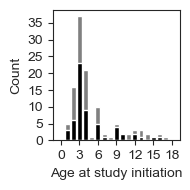

In [4]:
#plot ages of M/F in histogram

age_df = df.drop_duplicates(subset='master_ptid', keep='first') #unique entry for each participant when they have first observation

y,x = np.histogram(age_df['age_yr']*12,bins=np.arange(20))

yf,xf = np.histogram(age_df['age_yr'][age_df['infsex']=='Female']*12,bins=np.arange(20))

plt.figure(figsize=(2,2))
plt.bar(x[:-1],y,color='gray')
plt.bar(xf[:-1],yf,color='k')
plt.yticks(np.arange(0,40,5))
plt.xticks(np.arange(0,20,3))
plt.xlabel('Age at study initiation')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('figures/Nhist-original.pdf',dpi=600)

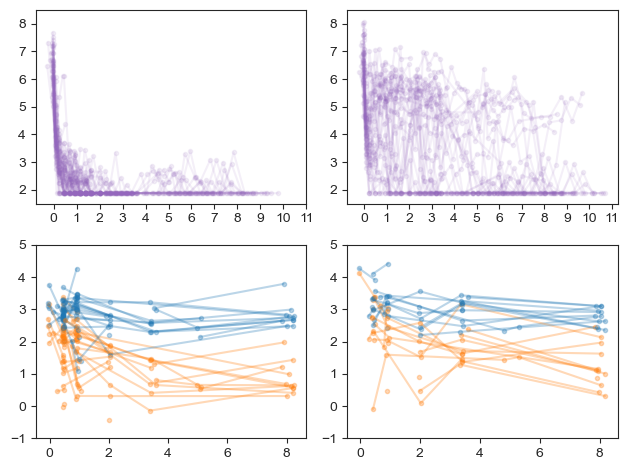

In [7]:
#plot viral loads for suppressed and non suppressed

for p in df['short_id'].unique():
    

    if p in list(df_supp['short_id']):
        tdf=df_supp[df_supp['short_id']==p]
        plt.subplot(221)
        plt.plot(tdf['time_ART_mo']/12,tdf['log10VL'],color='tab:purple',alpha=0.1,marker='.')#additional rules?
        plt.ylim([1.5,8.5])
        plt.yticks(np.arange(2,9))
        plt.xticks(np.arange(0,12,1))

        tdf=df_supp[df_supp['short_id']==p].dropna()
        plt.subplot(223)
        plt.plot(tdf['time_ART_mo']/12,tdf['log10int'],color='tab:orange',alpha=0.3,marker='.')#additional rules?
        plt.plot(tdf['time_ART_mo']/12,tdf['log10def'],color='tab:blue',alpha=0.3,marker='.')#additional rules?
        plt.ylim([-1,5])
        
        
    else:
        tdf=df[df['short_id']==p]    
        plt.subplot(222)
        plt.plot(tdf['ART_mo']/12,tdf['log10VL'],color='tab:purple',alpha=0.1,marker='.')#additional rules?
        plt.ylim([1.5,8.5])
        plt.yticks(np.arange(2,9))
        plt.xticks(np.arange(0,12,1))

        tdf=df[df['short_id']==p].dropna()
        plt.subplot(224)
        plt.plot(tdf['ART_mo']/12,tdf['log10int'],color='tab:orange',alpha=0.3,marker='.')#additional rules?
        plt.plot(tdf['ART_mo']/12,tdf['log10def'],color='tab:blue',alpha=0.3,marker='.')#additional rules?
        plt.ylim([-1,5])
        
plt.tight_layout()

plt.savefig('figures/subsetting.pdf',dpi=600)

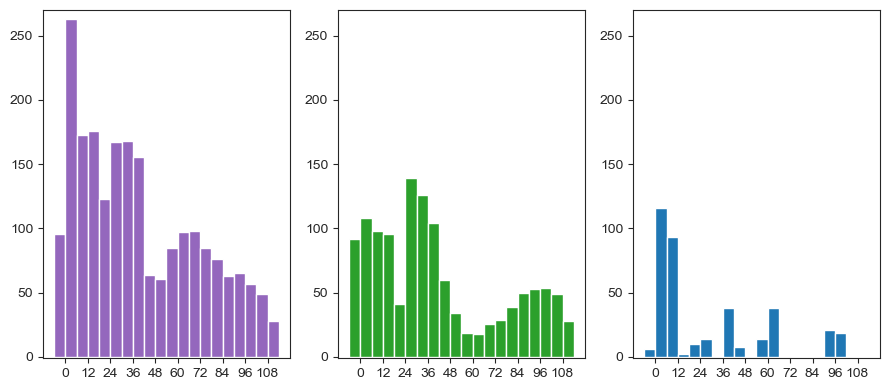

In [10]:
#time points:

plt.figure(figsize=(9,4))

plt.subplot(131)
plt.hist(df[['ART_mo','log10VL']].dropna()['ART_mo'],bins=np.arange(-6,120,6),color='tab:purple')

plt.subplot(132)
plt.hist(df[['ART_mo','cd4count']].dropna()['ART_mo'],bins=np.arange(-6,120,6),color='tab:green')

plt.subplot(133)
plt.hist(df[['ART_mo','log10def']].dropna()['ART_mo'],bins=np.arange(-6,120,6),color='tab:blue')

for i in range(3):
    plt.subplot(131+i)
    plt.xticks(np.arange(0,120,12))
    plt.ylim([-1,270])

plt.tight_layout()

plt.savefig('figures/numbersamples.pdf',dpi=600)

In [11]:
#number of participants with time > X

for tfollowup in [-10,12,24,40,60,90]:
    print(tfollowup,len(df[df['ART_mo']>tfollowup]['short_id'].unique()))


-10 120
12 95
24 92
40 75
60 60
90 57


In [12]:
#suppressed...

for tfollowup in [12,24,40,60,90]:
    print(tfollowup,len(df_supp[df_supp['time_ART_mo']>tfollowup]['short_id'].unique()))


12 47
24 27
40 16
60 14
90 12


In [14]:
#histogram for Fig1 information on number of samples at each binned timepoint

#roughly preART, 6mo 12mo 2year, 4year, 5year, 8yr

np.histogram(df[['ART_mo','log10def']].dropna()['ART_mo'],bins=[-6,0,6,12,30,50,72,120])


(array([  6, 116,  93,  26,  46,  52,  40]),
 array([ -6,   0,   6,  12,  30,  50,  72, 120]))

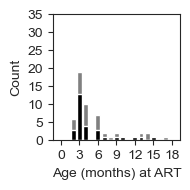

In [15]:
#plot numbers
y,x = np.histogram(agel,bins=np.arange(20))

yf,xf = np.histogram(np.array(agel)[np.array(mfl)==0],bins=np.arange(20))

plt.figure(figsize=(2,2))
plt.bar(x[:-1],y,color='gray')
plt.bar(xf[:-1],yf,color='k')
plt.yticks(np.arange(0,40,5))
plt.xticks(np.arange(0,20,3))
plt.xlabel('Age (months) at ART')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('figures/Nhist-suppressedsubset.pdf',dpi=600)

In [16]:
#get viremic subset ids

df_ns=pd.DataFrame()
for sid in df['short_id'].unique():
    
    if sid not in df_supp['short_id'].unique():
        tdf = df[df['short_id']==sid]
    else:
        df_ns = df_ns._append(tdf)
    

MannwhitneyuResult(statistic=1674.0, pvalue=2.3086990598151435e-06)
MannwhitneyuResult(statistic=444.0, pvalue=7.447566933210453e-07)
MannwhitneyuResult(statistic=1914.0, pvalue=7.121134705287826e-05)
MannwhitneyuResult(statistic=359.0, pvalue=2.2119957913392375e-08)


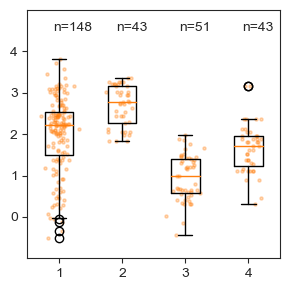

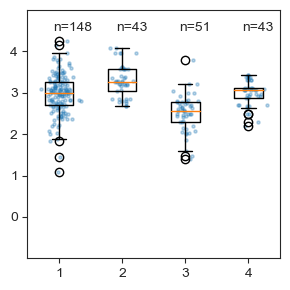

In [17]:
#do comparison between suppressed and viremic subsets

for i in range(2):
    obs=['log10int','log10def'][i]; 
    cz=['tab:orange','tab:blue'][i]

    s_l1 = df_supp[df_supp['time_ART_mo']<12][obs].dropna()
    s_g1 = df_supp[df_supp['time_ART_mo']>12][obs].dropna()

    ns_l1 = df_ns[df_ns['ART_mo']<12][obs].dropna() 
    ns_g1 = df_ns[df_ns['ART_mo']>12][obs].dropna() 

    dl=[s_l1,ns_l1,s_g1,ns_g1]#,pb] #list of data

    plt.figure(figsize=(3,3))
    for idl,d in enumerate(dl):
        plt.scatter(np.random.normal(1,0.1,len(d))+idl,d,color=cz,alpha=0.3,s=5)
        plt.annotate('n='+str(len(d)),[idl+0.9,4.5],)

    plt.boxplot(dl)
    plt.yticks(np.arange(5))
    plt.ylim([-1,5])
    #plt.xticks(np.arange(len(dl))+1,['Suppressed <1 yr','Not-suppressed <1 yr','Suppressed >1 yr','Not-suppressed >1 yr'],rotation=90)
    #plt.xlabel('Time points')
    #plt.ylabel(obs)

    print(st.mannwhitneyu(s_l1,ns_l1))
    print(st.mannwhitneyu(s_g1,ns_g1))

    plt.tight_layout()
    plt.savefig('figures/simple-excludeDNA'+obs+'.pdf',dpi=600)


MannwhitneyuResult(statistic=1122.0, pvalue=0.1881783194119543)
MannwhitneyuResult(statistic=164.0, pvalue=0.6135335421794746)
MannwhitneyuResult(statistic=1101.0, pvalue=0.2533801965170598)
MannwhitneyuResult(statistic=91.0, pvalue=0.018853377367019163)


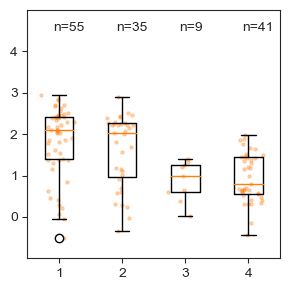

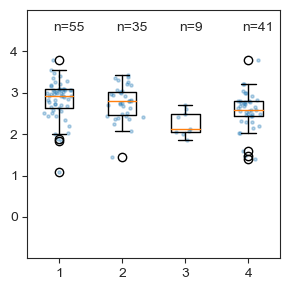

In [18]:
#now do comparison within supp vs undetectable supp

for i in range(2):
    obs=['log10int','log10def'][i]; 
    cz=['tab:orange','tab:blue'][i]
    
    s_l1 = df_supp[(df_supp['time_ART_mo']<12) & (df_supp['log10VL']<3) & (df_supp['log10VL']>2)][obs].dropna()
    u_l1 = df_supp[(df_supp['time_ART_mo']<12) & (df_supp['log10VL']<2)][obs].dropna()

    s_g1 = df_supp[(df_supp['time_ART_mo']>12) & (df_supp['log10VL']<3) & (df_supp['log10VL']>2)][obs].dropna()
    u_g1 = df_supp[(df_supp['time_ART_mo']>12) & (df_supp['log10VL']<2)][obs].dropna()

    dl=[s_l1,u_l1,s_g1,u_g1]#,pb] #list of data

    plt.figure(figsize=(3,3))
    for idl,d in enumerate(dl):
        plt.scatter(np.random.normal(1,0.1,len(d))+idl,d,color=cz,alpha=0.3,s=5)

        plt.annotate('n='+str(len(d)),[idl+0.9,4.5],)
        
    plt.boxplot(dl)
    plt.yticks(np.arange(5))
    plt.ylim([-1,5])
    #plt.xticks(np.arange(len(dl))+1,['Suppressed <1 yr','Not-suppressed <1 yr','Suppressed >1 yr','Not-suppressed >1 yr'],rotation=90)
    #plt.xlabel('Time points')
    #plt.ylabel(obs)

    print(st.mannwhitneyu(s_l1,u_l1))
    print(st.mannwhitneyu(s_g1,u_g1))

    plt.tight_layout()
    plt.savefig('figures/simple-suppvsundetect'+obs+'.pdf',dpi=600)
